# Interpolacija funkcija
---

Neka je zadana funkcija $f(x)$ na intervalu $[a,b]$.

Odaberimo $n+1$ točku $x_i, i=0,\ldots, n$ u intervalu $[a,b]$ tako da je $x_i\neq x_j$
i kroz točke $(x_i,f(x_i)$ provucimo interpolacijski polinom.

Za svaku točku $x\in[a,b]$ vrijedi __ocjena pogreške__ (uz pretpostavku da funkcija $f$ ima $n-1$ derivaciju) 

$$
f(x)-p_n(x)=\frac{\omega(x)}{(n+1)!} f^{(n+1)}(\xi) \\
\omega(x)=\prod_{k=0}^n (x-x_k)=(x-x_0)(x-x_1)\cdots (x-x_n) \tag{1}\\ 
\xi \in (a,b)
$$

Dokaz se nalazi u [Numerička matematika, str. 23][RS04].

[RS04]: http://www.mathos.unios.hr/pim/Materijali/Num.pdf "R. Scitovski, 'Numerička matematika', Sveučilište u Osijeku, Osijek, 2004."


## Primjer

Promotrimo funkciju 

$$
f(x)=\sin(x), \quad x\in[0,\pi].
$$

In [2]:
using Polynomials
using SpecialMatrices
using Winston

In [3]:
n=6
a=0
b=pi
x=collect(linspace(a,b,n))
y=sin(x)

6-element Array{Float64,1}:
 0.0        
 0.587785   
 0.951057   
 0.951057   
 0.587785   
 1.22465e-16

In [4]:
A=Vandermonde(x)

6x6 SpecialMatrices.Vandermonde{Float64}:
 1.0  0.0       0.0        0.0       0.0         0.0      
 1.0  0.628319  0.394784   0.24805   0.155855    0.0979263
 1.0  1.25664   1.57914    1.9844    2.49367     3.13364  
 1.0  1.88496   3.55306    6.69736  12.6242     23.7961   
 1.0  2.51327   6.31655   15.8752   39.8988    100.277    
 1.0  3.14159   9.8696    31.0063   97.4091    306.02     

In [5]:
c=full(A)\y

6-element Array{Float64,1}:
  0.0        
  0.985329   
  0.0524812  
 -0.23308    
  0.0370958  
  5.84581e-16

In [6]:
p=Poly(c)

Poly(0.985329052071877x + 0.052481152159949494x^2 - 0.23307995080786126x^3 + 0.03709582630668434x^4 + 5.845812127596235e-16x^5)

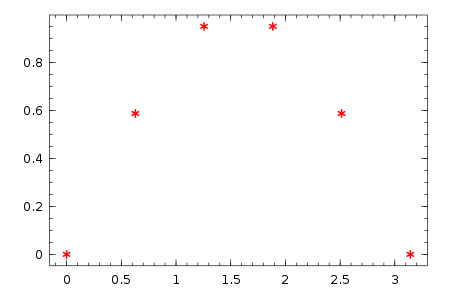

In [7]:
plot(x,y,"r*")

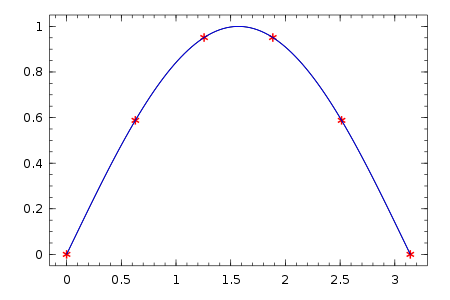

In [8]:
xx=linspace(a,b,100)
pS=polyval(p,xx)
sinus=sin(xx)
plot(x,y,"r*",xx,pS,xx,sinus,"b")

In [9]:
# maksimalne apsolutna i relativna pogreška
norm(pS[2:end-1]-sinus[2:end-1],Inf), norm((pS[2:end-1]-sinus[2:end-1])./sinus[2:end-1],Inf)

(0.0013114413107389589,0.013073445174542906)

## Čebiševljeve točke

__Čebiševljevi polinomi__ su polinomi stupnja $n$ dani formulom

$$
T_n(x)=\cos(n*\arccos x), \quad n=0,1,2,\ldots
$$

Vrijedi rekurzivna formula:

$$
T_0(x)=1,\\ T_1(x)=x,\\ T_{n+1}(x)=2xT_n(x)-T_{n-1}(x), \quad n=1,2,\ldots
$$

Dakle, 

$$
T_2(x)=2x^2-1,\quad T_3(x)=4x^3-3x, \ldots
$$

Nultočke polinoma $T_n(x)$ sve leže unutar intervala $[-1,1]$ i jednake su

$$
x_k=\cos \bigg(\frac{2k-1}{2n}\pi\bigg), \quad k=1,2,\ldots,n.
$$

Na intervalu $[-1,1]$ polinom $T_n(x)$ poprima vrijednosti u intervalu $[-1,1]$.

Na primjer:

In [10]:
T(n,x)=cos(n*acos(x))

T (generic function with 1 method)

In [11]:
x1=linspace(-1,1,100)

linspace(-1.0,1.0,100)

In [12]:
y1=T(10,x1)

100-element Array{Float64,1}:
  1.0     
 -0.428362
 -0.958456
 -0.936674
 -0.616793
 -0.178048
  0.259411
  0.621398
  0.868645
  0.987601
  0.982859
  0.871005
  0.675712
  ⋮       
  0.871005
  0.982859
  0.987601
  0.868645
  0.621398
  0.259411
 -0.178048
 -0.616793
 -0.936674
 -0.958456
 -0.428362
  1.0     

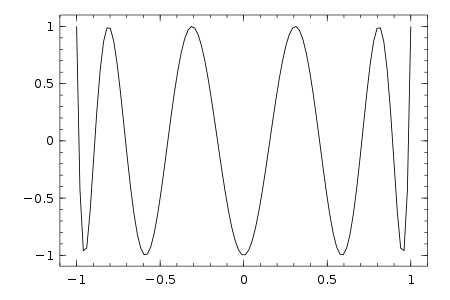

In [13]:
plot(x1,y1)

In [14]:
xn=map(Float64,[cos((2*k-1)*pi/(2*10)) for k=1:10])

10-element Array{Float64,1}:
  0.987688
  0.891007
  0.707107
  0.45399 
  0.156434
 -0.156434
 -0.45399 
 -0.707107
 -0.891007
 -0.987688

In [15]:
yn=T(10,xn)

10-element Array{Float64,1}:
  2.72577e-15
 -1.07188e-15
  3.06162e-16
 -4.28626e-16
  5.51091e-16
 -2.44991e-15
 -9.80336e-16
 -2.69484e-15
 -7.35407e-16
 -6.49248e-15

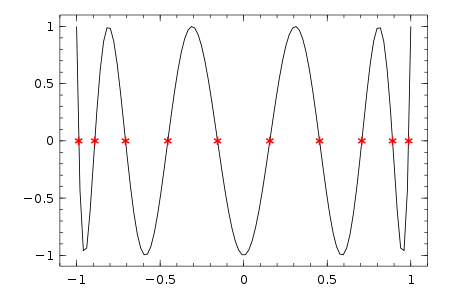

In [16]:
plot(x1,y1,xn,yn,"r*")

### Norme funkcija

Za funkcije 

$$f,g:[a,b]\to \mathbb{R}$$

definiramo __skalarni produkt__

$$
(f,g)=\int_a^b f(x)g(x)\, dx
$$

i __težinski skalarni produkt__ s _težinom_ $\omega(x)>0$

$$
(f,g)_\omega=\int_a^b f(x)g(x)\omega(x)\, dx
$$

> Funkcije $f$ i $g$ su __ortogonalne__ ako je $(f,g)=0$ ili $(f,g)_\omega=0$.

Imamo tri __norme__ (prirodna poopćenja odgovarajućih vektorskih normi)

$$
\|f\|_2=\sqrt{(f,f)}=\sqrt{\int_a^b f^2(x)\, dx} \\
\|f\|_1 = \int_a^b |f(x)|\, dx \\
\|f\|_\infty=\max_{x\in[a,b]} |f(x)|
$$

Vrijedi sljedeći važan teorem:

> Od svih polinoma stupnja manje ili jednako $n$ čiji je koeficijent uz najveću potenciju jednak $1$, najmanju 
$\|\cdot\|_\infty$ na intervalu $[-1,1]$ ima upravo Čebiševljev polinom $T_n(x)$ i ta norma iznosi $\frac{1}{2^{n-1}}$.

Zaključujemo da će polinomna aproksimacija (1) biti najbolja ako je 

$$\omega(x)=T_{n+1}(x),$$ 

odnosno ako za 
točke interpolacije $x_0,x_1,\ldots,x_n$ odaberemo upravo nul-točke polinoma $T_{n+1}(x)$ preslikane na interval $[a,b]$.

In [17]:
# Odaberimo za interpolaciju sinusa nultočke polinoma T(n,x)
xc=(a+b)/2+(b-a)/2*map(Float64,[cos((2*k-1)*pi/(2*n)) for k=1:n])

6-element Array{Float64,1}:
 3.08807  
 2.68152  
 1.97735  
 1.16424  
 0.460076 
 0.0535236

In [18]:
yc=sin(xc)

6-element Array{Float64,1}:
 0.053498
 0.444016
 0.91849 
 0.91849 
 0.444016
 0.053498

In [19]:
Ac=Vandermonde(xc)
cc=full(Ac)\yc
pc=Poly(cc)

Poly(0.0005833790342029133 + 0.9866631446414152x + 0.048880818533718076x^2 - 0.2310582509107541x^3 + 0.03677406277461332x^4)

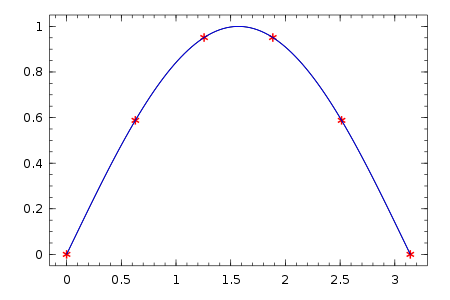

In [20]:
xx=linspace(a,b,100)
pC=polyval(pc,xx)
sinus=sin(xx)
plot(x,y,"r*",xx,pS,xx,sinus,"b")

In [21]:
# maksimalne apsolutna i relativna pogreška
norm(pC[2:end-1]-sinus[2:end-1],Inf), norm((pC[2:end-1]-sinus[2:end-1])./sinus[2:end-1],Inf)

(0.0006090743316022884,0.006535549604607928)

Pogledajmo kako izgledaju stvarne pogreške u oba slučaja:

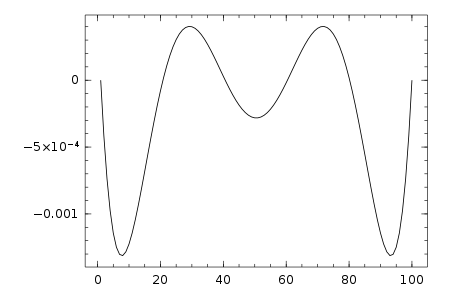

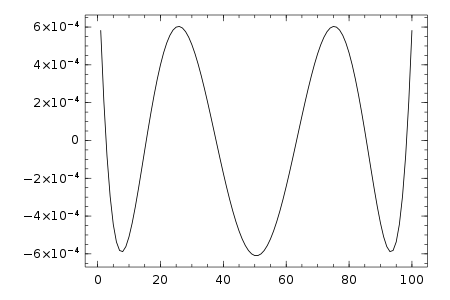

(nothing,nothing)

In [22]:
p1=plot(pS-sinus) # ravnomjerno rasporedjene točke
p2=plot(pC-sinus) # Čebiševljeve točke
display(p1),display(p2)

> Vidimo da su za Čebiševljeve točke postignute manje pogreške.

_Napomena:_ ovdje smo, radi jednostavnosti, koristili najmanje točnu varijantu računanja interpolacijskog polinoma.

Napravimo još jedan zanimljiv primjer iz [Numeričke matematike, str. 24][RS04]:

[RS04]: http://www.mathos.unios.hr/pim/Materijali/Num.pdf "R. Scitovski, 'Numerička matematika', Sveučilište u Osijeku, Osijek, 2004."

> interpolirajmo funkciju

> $$
f(x)=1-|x-1|,\quad x\in[0,2]
$$

> polinomomima stupnja 10.

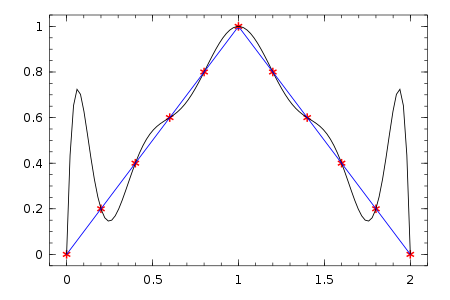

In [23]:
n=11
a=0
b=2
f(x)=1-abs(x-1)

# Ravnomjerno raspoređene točke
x=collect(linspace(a,b,n))
y=f(x)
A=Vandermonde(x)
c=full(A)\y
p=Poly(c)

plot(x,y,"r*")
xx=collect(linspace(a,b,100))
pS=polyval(p,xx)
F=f(xx)
plot(x,y,"r*",xx,pS,xx,F,"b")

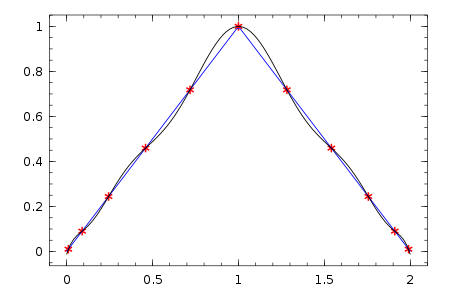

In [25]:
# Čebiševljeve točke
xc=(a+b)/2+(b-a)/2*map(Float64,[cos((2*k-1)*pi/(2*n)) for k=1:n])
yc=f(xc)
Ac=Vandermonde(xc)
cc=full(Ac)\yc
pc=Poly(cc)
# F=f(xx)
# xx=linspace(a,b,100)
pC=polyval(pc,xx)
plot(xc,yc,"r*",xx,F,"b",xx,pC)